In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [27]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [12]:
df = pd.read_csv('./datasets/Sonar.csv')

print(df.shape)
df.head()

(208, 61)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [13]:
dataset = df.values
X = dataset[:, 0:60]
X = np.asarray(X).astype(np.float32)

Y = dataset[:, 60]

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=200, batch_size=5)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 611us/step - loss: 0.6723 - accuracy: 0.6683
Epoch 2/200
42/42 [==============================] - 0s 529us/step - loss: 0.6396 - accuracy: 0.6827
Epoch 3/200
42/42 [==============================] - 0s 592us/step - loss: 0.6107 - accuracy: 0.7163
Epoch 4/200
42/42 [==============================] - 0s 532us/step - loss: 0.5888 - accuracy: 0.6923
Epoch 5/200
42/42 [==============================] - 0s 547us/step - loss: 0.5621 - accuracy: 0.7115
Epoch 6/200
42/42 [==============================] - 0s 523us/step - loss: 0.5391 - accuracy: 0.7740
Epoch 7/200
42/42 [==============================] - 0s 547us/step - loss: 0.5054 - accuracy: 0.7740
Epoch 8/200
42/42 [==============================] - 0s 573us/step - loss: 0.4924 - accuracy: 0.7740
Epoch 9/200
42/42 [==============================] - 0s 533us/step - loss: 0.4792 - accuracy: 0.7837
Epoch 10/200
42/42 [==============================] - 0s 570us/step - loss: 0.4498 - accura

In [14]:
# history = model.fit(X, Y, epochs=200, batch_size=5)

In [15]:
result = history.history

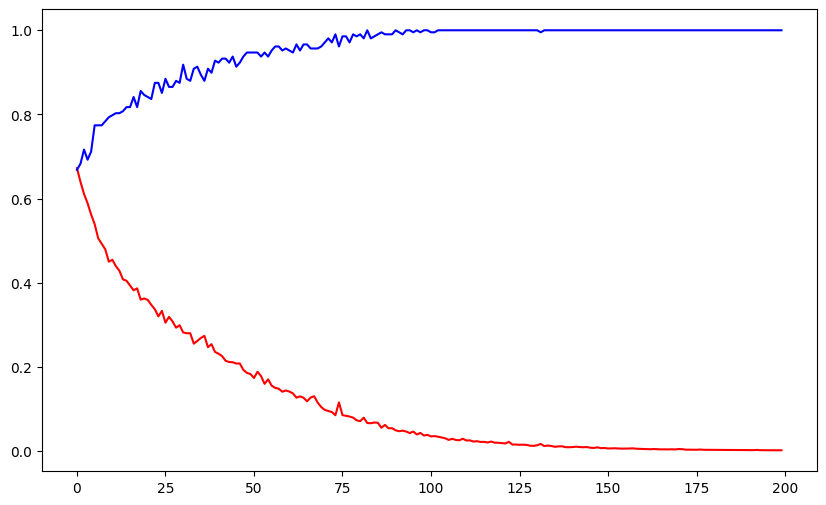

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(result['loss'], c='red', label='loss')
plt.plot(result['accuracy'], c='blue', label='accuracy')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=5)

print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
29/29 [==============================] - 0s 535us/step - loss: 0.7009 - accuracy: 0.5241
Epoch 2/200
29/29 [==============================] - 0s 509us/step - loss: 0.6839 - accuracy: 0.5310
Epoch 3/200
29/29 [==============================] - 0s 550us/step - loss: 0.6729 - accuracy: 0.5241
Epoch 4/200
29/29 [==============================] - 0s 594us/step - loss: 0.6646 - accuracy: 0.5931
Epoch 5/200
29/29 [==============================] - 0s 506us/step - loss: 0.6520 - accuracy: 0.5862
Epoch 6/200
29/29 [==============================] - 0s 514us/step - loss: 0.6429 - accuracy: 0.6483
Epoch 7/200
29/29 [==============================] - 0s 519us/step - loss: 0.6317 - accuracy: 0.6621
Epoch 8/200
29/29 [==============================] - 0s 514us/step - loss: 0.6162 - accuracy: 0.7379
Epoch 9/200
29/29 [==============================] - 0s 479us/step - loss: 0.6010 - accuracy: 0.7517
Epoch 10/200
29/29 [==============================] - 0s 534us/step - loss: 0.5853 - accura

In [20]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=130, batch_size=5)

model.save('my_model.h5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 593us/step - loss: 0.6889 - accuracy: 0.5172
Epoch 2/130
29/29 [==============================] - 0s 512us/step - loss: 0.6687 - accuracy: 0.6345
Epoch 3/130
29/29 [==============================] - 0s 685us/step - loss: 0.6532 - accuracy: 0.6828
Epoch 4/130
29/29 [==============================] - 0s 524us/step - loss: 0.6382 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 430us/step - loss: 0.6178 - accuracy: 0.6828
Epoch 6/130
29/29 [==============================] - 0s 510us/step - loss: 0.6012 - accuracy: 0.7379
Epoch 7/130
29/29 [==============================] - 0s 453us/step - loss: 0.5821 - accuracy: 0.6966
Epoch 8/130
29/29 [==============================] - 0s 535us/step - loss: 0.5666 - accuracy: 0.7724
Epoch 9/130
29/29 [==============================] - 0s 516us/step - loss: 0.5399 - accuracy: 0.7586
Epoch 10/130
29/29 [==============================] - 0s 484us/step - loss: 0.5234 - accura

In [22]:
model = load_model('my_model.h5')

In [23]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8730


[0.3915431499481201, 0.8730158805847168]

In [30]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []

for train, test in skf.split(X, Y):
	model = Sequential()
	model.add(Dense(24, input_dim=60, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))

	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	model.fit(X[train], Y[train], epochs=100, batch_size=5)

	k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
	accuracy.append(k_accuracy)

print("\n %.f fold accuracy: " % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 614us/step - loss: 0.7124 - accuracy: 0.4652
Epoch 2/100
38/38 [==============================] - 0s 564us/step - loss: 0.6831 - accuracy: 0.5989
Epoch 3/100
38/38 [==============================] - 0s 571us/step - loss: 0.6726 - accuracy: 0.5936
Epoch 4/100
38/38 [==============================] - 0s 601us/step - loss: 0.6599 - accuracy: 0.7005
Epoch 5/100
38/38 [==============================] - 0s 520us/step - loss: 0.6452 - accuracy: 0.6898
Epoch 6/100
38/38 [==============================] - 0s 524us/step - loss: 0.6265 - accuracy: 0.6738
Epoch 7/100
38/38 [==============================] - 0s 563us/step - loss: 0.6051 - accuracy: 0.6791
Epoch 8/100
38/38 [==============================] - 0s 555us/step - loss: 0.5797 - accuracy: 0.7380
Epoch 9/100
38/38 [==============================] - 0s 537us/step - loss: 0.5524 - accuracy: 0.7380
Epoch 10/100
38/38 [==============================] - 0s 593us/step - loss: 0.5207 - accura

In [31]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]],
      dtype=float32)